In [1]:
# %%pycodestyle
import pandas as pd
import numpy as np
import re
# %load_ext pycodestyle_magic
# Load package to confirm the code is PEP-8 formmat
# pip install pycodestyle
# pip install pycodestyle_magic
# Load libraries
# Checking
# pd
# np

In [2]:
# %%pycodestyle
# Set display to see data.
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

In [3]:
#%%pycodestyle
# Load dataframe
df = pd.read_csv("./DOT_teste_data_science.csv", encoding='ISO-8859-1')

In [4]:
# %%pycodestyle
# Change Column names
df.columns = ['Id', 'PlaceTest', 'DateTest',
              'Rate', 'TextRate', 'HourTest',
              'Sex', 'MaritalStatus', 'Education',
              'Hometown', 'Neighborhood']

# Create new dataframe with the changes and preserve the original
# Drop ID column
# df2 = df.drop(['Id'], axis=1)
df2 = df

# Show new dataframe
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood
0,,GO - Goiï¿½s,10/1/2017,"7,4","2,4",manhï¿½,Masculino,Casado(a),Especializaï¿½ï¿½o,Recife,Norte (ï¿½guas Claras)
1,,GO - Goiï¿½s,7/1/2017,"7,3","1,8",manhï¿½,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
2,,GO - Goiï¿½s,2/1/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino mï¿½dio,Brasï¿½lia,Setor Norte
3,,GO - Goiï¿½s,9/1/2017,"6,95","1,7",manhï¿½,Feminino,Solteiro(a),Superior,BRASï¿½LIA,Guarï¿½ I
4,,GO - Goiï¿½s,10/1/2017,"6,9","2,4",manhï¿½,Feminino,Solteiro(a),Ensino mï¿½dio,ANï¿½POLIS,Jardim Europa


In [5]:
# %%pycodestyle
# Check if there is all values.
df2.isnull().values.any()

True

In [6]:
# %%pycodestyle
# Unique Counts


def isNaN(df):
    for i in df.columns:
        count = df[i].isnull().values.any()
        print(i, ": ", count)


# Check all columns, True = There is NaN, False = There is no Nan.
print(isNaN(df2))

Id :  False
PlaceTest :  False
DateTest :  True
Rate :  False
TextRate :  False
HourTest :  True
Sex :  True
MaritalStatus :  True
Education :  True
Hometown :  True
Neighborhood :  True
None


In [7]:
# %%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


Id               object
PlaceTest        object
DateTest         object
Rate             object
TextRate         object
HourTest         object
Sex              object
MaritalStatus    object
Education        object
Hometown         object
Neighborhood     object
dtype: object

In [8]:
# %%pycodestyle
# Change comma to dot.
df2.Rate.replace(",", ".", regex=True, inplace=True)
df2.TextRate.replace(",", ".", regex=True, inplace=True)
df2.DateTest.replace("/", "-", regex=True, inplace=True)
# Transform Rate and TextRate to float.
df2[["Rate", "TextRate"]] = df2[["Rate", "TextRate"]].apply(pd.to_numeric)

In [9]:
# %%pycodestyle
# Create new column to identify who has rate above zero.
conditions = [(df2['Rate'] >= 5.0) & (df2['TextRate'] > 0.0)]
choices = [1]

df2['Approved'] = np.select(conditions, choices, default=0)


In [10]:
# %%pycodestyle
# Create new column to with All Rate.
df2['AllRate'] = df2['Rate'] + df2['TextRate']


In [11]:
# %%pycodestyle
# Create new column to identify who doesn't got the rate above 0.
conditions = [(df2['TextRate'] > 0.0)]
choices = [1]

df2['HasTextRate'] = np.select(conditions, choices, default=0)


In [12]:
df2['DateTest'] = pd.to_datetime(df2['DateTest'])

In [13]:
df2['Month'] = df2.DateTest.dt.month
df2['Year'] = df2.DateTest.dt.year
df2['Month'] = df2['Month'].fillna(0).astype(int)
df2['Year'] = df2['Year'].fillna(0).astype(int)
#df2[["Month", "Year"]] = df2[["Month", "Year"]].apply(pd.to_numeric)

In [14]:
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,,GO - Goiï¿½s,2017-10-01,7.40,2.4,manhï¿½,Masculino,Casado(a),Especializaï¿½ï¿½o,Recife,Norte (ï¿½guas Claras),1,9.80,1,10,2017
1,,GO - Goiï¿½s,2017-07-01,7.30,1.8,manhï¿½,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
2,,GO - Goiï¿½s,2017-02-01,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino mï¿½dio,Brasï¿½lia,Setor Norte,1,8.90,1,2,2017
3,,GO - Goiï¿½s,2017-09-01,6.95,1.7,manhï¿½,Feminino,Solteiro(a),Superior,BRASï¿½LIA,Guarï¿½ I,1,8.65,1,9,2017
4,,GO - Goiï¿½s,2017-10-01,6.90,2.4,manhï¿½,Feminino,Solteiro(a),Ensino mï¿½dio,ANï¿½POLIS,Jardim Europa,1,9.30,1,10,2017


In [15]:
# %%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


Id                       object
PlaceTest                object
DateTest         datetime64[ns]
Rate                    float64
TextRate                float64
HourTest                 object
Sex                      object
MaritalStatus            object
Education                object
Hometown                 object
Neighborhood             object
Approved                  int64
AllRate                 float64
HasTextRate               int64
Month                     int64
Year                      int64
dtype: object

In [16]:
# %%pycodestyle
print('Decribe: ')
df2.describe()

Decribe: 


,Rate,TextRate,Approved,AllRate,HasTextRate,Month,Year
count,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000
mean,4.577751,0.874263,0.481527,5.452014,0.532275,5.327630,2009.950326
std,1.704089,0.855238,0.499679,2.510036,0.498978,4.050713,115.766109
min,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2016.000000
50%,4.850000,1.100000,0.000000,6.150000,1.000000,5.000000,2017.000000
75%,5.950000,1.700000,1.000000,7.600000,1.000000,8.000000,2017.000000
max,10.000000,2.500000,1.000000,12.500000,1.000000,12.000000,2017.000000


In [17]:
#!pip install pandasql
from pandasql import sqldf
from pandasql import load_meat, load_births
import matplotlib.pyplot as plt
sqlqry = sqldf("select Year, COUNT(Approved) as People from df2 WHERE Approved = 1 group by 1 order by 1")

# print(sqlqry['Year'])
# print(sqlqry['People'])

x = ['0', '2016', '2017']
y = [14, 2863, 2949]
plt.bar(x, y)
plt.xticks(sqlqry['Year'])
plt.show()

0       14
1        8
2       10
3     3185
4      245
5       21
6       51
7        4
8      208
9     1489
10     591
Name: Approved, dtype: int64
0                       0
1               Doutorado
2      Ensino fundamental
3          Ensino mï¿½dio
4      Especializaï¿½ï¿½o
5                     MBA
6                Mestrado
7         Nï¿½o informado
8       Nï¿½vel tï¿½cnico
9                Superior
10    Superior incompleto
Name: Education, dtype: object
['0', 'D', 'EF', 'EM', 'ESP', 'MBA', 'MSC', 'N/A', 'NT', 'S', 'SI'] [14, 8, 10, 3185, 245, 21, 51, 4, 208, 1489, 591]


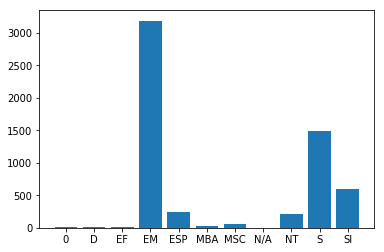

In [18]:
sqlqry = sqldf("select Education, COUNT(Approved) as Approved from df2 WHERE Approved = 1 group by 1 order by 1")

print(sqlqry['Approved'].fillna(0))
print(sqlqry['Education'].fillna(0))

# "0", "Doutorado", "Ensino fundamental", "Ensino mï¿½dio", "Especializaï¿½ï¿½o", "MBA", "Mestrado", "Nï¿½o informado", "Nï¿½vel tï¿½cnico", "Superior", "Superior incompleto"
y = [14, 8, 10, 3185, 245, 21, 51, 4, 208, 1489, 591]
x = ["0", "D", "EF", "EM", "ESP", "MBA", "MSC", "N/A", "NT", "S", "SI"]
plt.bar(x, y)
print(x, y)
#plt.show()

0      65
1     411
2     292
3      49
4     581
5     334
6     431
7     416
8     165
9     622
10    348
11     84
12     60
13    480
14     83
15    209
16    326
17    280
18    320
19     73
20    197
Name: Approved, dtype: int64
0                AM - Amazonas
1                   BA - Bahia
2                 CE - Cearï¿½
3        ES - Espï¿½rito Santo
4                 GO - Goiï¿½s
5              MA - Maranhï¿½o
6            MG - Minas Gerais
7      MS - Mato Grosso do Sul
8             MT - Mato Grosso
9                  PA - Parï¿½
10              PB - Paraï¿½ba
11             PE - Pernambuco
12                PI - Piauï¿½
13         RJ - Rio de Janeiro
14    RN - Rio Grande do Norte
15             RO - Rondï¿½nia
16                RR - Roraima
17      RS - Rio Grande do Sul
18         SC - Santa Catarina
19                SE - Sergipe
20              TO - Tocantins
Name: PlaceTest, dtype: object
['AM', 'BA', 'CE', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 

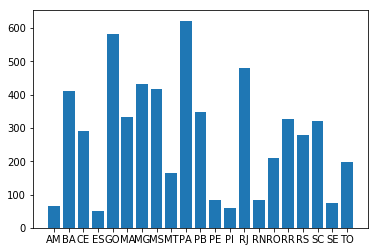

In [19]:
sqlqry = sqldf("select PlaceTest, COUNT(Approved) as Approved from df2 WHERE Approved = 1 group by 1 order by 1")

print(sqlqry['Approved'].fillna(0))
print(sqlqry['PlaceTest'].fillna(0))

y = [65, 411, 292, 49, 581, 334, 431, 416, 165, 622, 348, 84, 60, 480, 83, 209, 326, 280, 320, 73, 197]
x = ["AM", "BA", "CE", "ES", "GO", "MA", "MG", "MS", "MT", "PA", "PB", "PE", "PI", "RJ", "RN", "RO", "RR", "RS", "SC", "SE", "TO"]
plt.bar(x, y)
print(x, y)
#plt.show()

0      14
1       1
2    1782
3     249
4      59
5    3700
6      21
Name: Approved, dtype: int64
0                0
1                0
2        Casado(a)
3    Divorciado(a)
4      Separado(a)
5      Solteiro(a)
6       Viï¿½vo(a)
Name: MaritalStatus, dtype: object
['0', '0', 'C', 'D', 'SE', 'SO', 'V'] [14, 1, 1782, 249, 59, 3700, 21]


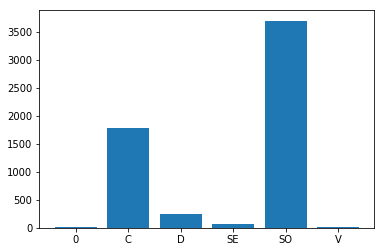

In [20]:
sqlqry = sqldf("select MaritalStatus, COUNT(Approved) as Approved from df2 WHERE Approved = 1 group by 1 order by 1")

print(sqlqry['Approved'].fillna(0))
print(sqlqry['MaritalStatus'].fillna(0))

y = [14, 1, 1782, 249, 59, 3700, 21]
x = ["0", "0", "C", "D", "SE", "SO", "V"]
plt.bar(x, y)
print(x, y)
#plt.show()

In [64]:
sqlqry = sqldf("select MaritalStatus, Education, COUNT(Approved) as Approved from df2 WHERE Approved = 1 AND MaritalStatus = 4 AND Education = 8 group by MaritalStatus, Education order by 1")
# (Approved = 1 AND MaritalStatus = 4) AND (Approved = 1 AND MaritalStatus = 1) AND (Approved = 1 AND Education = 3) AND (Approved = 1 AND Education = 8) AND (Approved = 1 AND Education = 9) 

# print(sqlqry['Approved'].fillna(0))
sqlqry
# y = [14, 1, 1782, 249, 59, 3700, 21]
# x = ["0", "0", "C", "D", "SE", "SO", "V"]
# plt.bar(x, y)
# print(x, y)
#plt.show()

,MaritalStatus,Education,Approved
0,4,8,873


In [22]:
# %%pycodestyle
# Unique Counts


def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)


print(unique_counts(df2))

Id :  1
PlaceTest :  21
DateTest :  34
Rate :  123
TextRate :  26
HourTest :  2
Sex :  2
MaritalStatus :  6
Education :  10
Hometown :  4590
Neighborhood :  4423
Approved :  2
AllRate :  161
HasTextRate :  2
Month :  13
Year :  3
None


In [23]:
# %%pycodestyle
print('Sex: ', df.Sex.unique())
print('HourTest: ', df.HourTest.unique())
print('MaritalStatus: ', df.MaritalStatus.unique())
print('Education: ', df.Education.unique())
print('PlaceTest: ', df.PlaceTest.unique())
print('Month: ', df.Month.unique())

Sex:  ['Masculino' 'Feminino' nan]
HourTest:  ['manhï¿½' 'Noite' nan]
MaritalStatus:  ['Casado(a)' 'Solteiro(a)' 'Divorciado(a)' 'Separado(a)' 'Viï¿½vo(a)' nan
 '0']
Education:  ['Especializaï¿½ï¿½o' 'Superior' 'Ensino mï¿½dio' 'Superior incompleto'
 'Mestrado' 'MBA' 'Nï¿½vel tï¿½cnico' 'Ensino fundamental' nan 'Doutorado'
 'Nï¿½o informado']
PlaceTest:  ['GO - Goiï¿½s' 'MG - Minas Gerais' 'MS - Mato Grosso do Sul'
 'PA - Parï¿½' 'PB - Paraï¿½ba' 'RJ - Rio de Janeiro'
 'SC - Santa Catarina' 'SE - Sergipe' 'CE - Cearï¿½' 'PI - Piauï¿½'
 'RN - Rio Grande do Norte' 'BA - Bahia' 'RS - Rio Grande do Sul'
 'RO - Rondï¿½nia' 'MT - Mato Grosso' 'PE - Pernambuco' 'RR - Roraima'
 'MA - Maranhï¿½o' 'ES - Espï¿½rito Santo' 'TO - Tocantins'
 'AM - Amazonas']
Month:  [10  7  2  9  1  5  8 12  6  3  0 11  4]


In [24]:
# %%pycodestyle
# Change Sex from text to integer: 0 - NaN, 1-Male, 2-Female.
conditions = [(df2['Sex'] == 'Masculino'),
              (df2['Sex'] == 'Feminino')]
choices = [1, 2]

df2['Sex'] = np.select(conditions, choices, default=0)

In [25]:
df2.groupby('Sex').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
Sex,,,,,,,,,,,,,,,,,
0,4587,,BA - Bahia,NaT,2.5,0.0,NaN,0,NaN,NaN,NaN,NaN,0,2.5,0,0,0
1,11871,,RO - Rondï¿½nia,2016-11-08,3.0,0.0,manhï¿½,1,Solteiro(a),Ensino mï¿½dio,nova mamore,planalto,0,3.0,0,11,2016
2,3641,,GO - Goiï¿½s,2017-01-15,3.5,0.0,Noite,2,Solteiro(a),Ensino mï¿½dio,Cristalina,Rio de Janeiro,0,3.5,0,1,2017


In [26]:
# %%pycodestyle
# Change HourTest from text to integer: 0 - NaN, 1-Morning, 2-Evening
conditions = [(df2['HourTest'] == 'manhï¿½'),
              (df2['HourTest'] == 'Noite')]
choices = [1, 2]

df2['HourTest'] = np.select(conditions, choices, default=0)

In [27]:
df2.groupby('HourTest').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
HourTest,,,,,,,,,,,,,,,,,
0,3694,,GO - Goiï¿½s,NaT,2.50,0.0,0,0,NaN,NaN,NaN,NaN,0,2.50,0,0,0
1,2498,,MG - Minas Gerais,2017-10-01,3.50,0.0,1,2,Solteiro(a),Ensino mï¿½dio,Curvelo,Centro,0,3.50,0,10,2017
2,3165,,PB - Paraï¿½ba,2017-01-16,2.75,0.0,2,2,Solteiro(a),Ensino mï¿½dio,Alagoa Grande,Povoado,0,2.75,0,1,2017


In [28]:
# %%pycodestyle
# Change MaritalStatus from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['MaritalStatus'] == 'Casado(a)'),
              (df2['MaritalStatus'] == 'Divorciado(a)'),
              (df2['MaritalStatus'] == 'Separado(a)'),
              (df2['MaritalStatus'] == 'Solteiro(a)'),
              (df2['MaritalStatus'] == 'Viï¿½vo(a)')]
choices = [1, 2, 3, 4, 5]

df2['MaritalStatus'] = np.select(conditions, choices, default=0)

In [29]:
df2.groupby('MaritalStatus').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
MaritalStatus,,,,,,,,,,,,,,,,,
0,1178,,BA - Bahia,NaT,5.65,1.9,0,0,0,NaN,NaN,NaN,1,7.55,1,0,0
1,7719,,RJ - Rio de Janeiro,2016-12-08,5.75,1.5,2,2,1,Nï¿½vel tï¿½cnico,Rio de Janeiro,Colï¿½nia Santo Antï¿½nio,1,7.25,1,12,2016
2,8752,,RJ - Rio de Janeiro,2016-08-13,7.00,1.5,1,1,2,Ensino mï¿½dio,Sï¿½o Gonï¿½alo,Maria Paula,1,8.50,1,8,2016
3,8342,,TO - Tocantins,2016-08-08,6.00,1.5,2,2,3,Superior incompleto,Brejinho de Nazarï¿½,Zona Rural,1,7.50,1,8,2016
4,1637,,MT - Mato Grosso,2017-12-01,5.10,1.1,2,1,4,Superior incompleto,palma sola,jd carolina,1,6.20,1,12,2017
5,1720,,PE - Pernambuco,2017-11-01,5.85,2.1,1,2,5,Superior,SALGUEIRO,COHAB Massangano,1,7.95,1,11,2017


In [30]:
# %%pycodestyle
# Change Education from text to integer:
# 0-NaN 
# 1-Doutorado
# 2-Ensino fundamental
# 3-Ensino médio
# 4-Especialização
# 5-MBA
# 6-Mestrado
# 7-Nível Técnico
# 8-Superior
# 9-Superior incompleto
# 10-Não informado
conditions = [(df2['Education'] == 'Doutorado'),
              (df2['Education'] == 'Ensino fundamental'),
              (df2['Education'] == 'Ensino mï¿½dio'),
              (df2['Education'] == 'Especializaï¿½ï¿½o'),
              (df2['Education'] == 'MBA'),
              (df2['Education'] == 'Mestrado'),
              (df2['Education'] == 'Nï¿½vel tï¿½cnico'),
              (df2['Education'] == 'Superior'),
              (df2['Education'] == 'Superior incompleto'),
              (df2['Education'] == 'Nï¿½o informado')]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df2['Education'] = np.select(conditions, choices, default=0)

In [31]:
df2.groupby('Education').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
Education,,,,,,,,,,,,,,,,,
0,1864,,MA - Maranhï¿½o,NaT,6.15,2.4,0,0,0,0,NaN,NaN,1,8.55,1,0,0
1,8705,,PB - Paraï¿½ba,2016-05-08,6.35,1.6,2,1,1,1,pimenteira,Malvinas,1,7.95,1,5,2016
2,11017,,PA - Parï¿½,2016-12-08,2.75,0.0,1,2,4,2,Dom Eliseu,centro,0,2.75,0,12,2016
3,5137,,RJ - Rio de Janeiro,2017-01-13,3.25,0.0,2,1,1,3,Cachoeiras de Macacu,Centro,0,3.25,0,1,2017
4,6528,,GO - Goiï¿½s,2017-12-01,3.50,0.0,2,1,1,4,goiania,Jardim Marques de Abreu,0,3.50,0,12,2017
5,60,,MG - Minas Gerais,2017-01-15,6.65,1.4,2,2,1,5,Governador Valadares,Santa Terezinha,1,8.05,1,1,2017
6,515,,RJ - Rio de Janeiro,2017-08-01,7.55,2.3,2,2,4,6,Barra Mansa,Bela Vista,1,9.85,1,8,2017
7,11165,,PA - Parï¿½,2016-07-28,3.25,0.0,2,1,1,7,flores,zona rural,0,3.25,0,7,2016
8,2762,,MS - Mato Grosso do Sul,2017-01-15,2.50,0.0,1,2,1,8,VILHENA,JARDIM NOVA ESPERANï¿½A,0,2.50,0,1,2017


In [32]:
# %%pycodestyle
# Change Placetest from text to integer: 0 - NaN,
# 1-MG - Minas Gerais
# 2-MS - Mato Grosso do Sul
# 3-PA - Pará
# 4-PB - Paraíba
# 5-RJ - Rio de Janeiro
# 6-SC - Santa Catarina
# 7-SE - Sergipe
# 8-CE - Ceará
# 9-PI - Piauí
# 10-RN - Rio Grande do Norte
# 11-BA - Bahia
# 12-RS - Rio Grande do Sul
# 13-RO - Rondônia
# 14-MT - Mato Grosso
# 15-PE - Pernambuco
# 16-RR - Roraima
# 17-MA - Maranhão
# 18-ES - Espírito Santo
# 19-TO - Tocantins
# 20-AM - Amazonas
# 21-GO - Goiás
conditions = [(df2['PlaceTest'] == 'MG - Minas Gerais'),
              (df2['PlaceTest'] == 'MS - Mato Grosso do Sul'),
              (df2['PlaceTest'] == 'PA - Parï¿½'),
              (df2['PlaceTest'] == 'PB - Paraï¿½ba'),
              (df2['PlaceTest'] == 'RJ - Rio de Janeiro'),
              (df2['PlaceTest'] == 'SC - Santa Catarina'),
              (df2['PlaceTest'] == 'SE - Sergipe'),
              (df2['PlaceTest'] == 'CE - Cearï¿½'),
              (df2['PlaceTest'] == 'PI - Piauï¿½'),
              (df2['PlaceTest'] == 'RN - Rio Grande do Norte'),
              (df2['PlaceTest'] == 'BA - Bahia'),
              (df2['PlaceTest'] == 'RS - Rio Grande do Sul'),
              (df2['PlaceTest'] == 'RO - Rondï¿½nia'),
              (df2['PlaceTest'] == 'MT - Mato Grosso'),
              (df2['PlaceTest'] == 'PE - Pernambuco'),
              (df2['PlaceTest'] == 'RR - Roraima'),
              (df2['PlaceTest'] == 'MA - Maranhï¿½o'),
              (df2['PlaceTest'] == 'ES - Espï¿½rito Santo'),
              (df2['PlaceTest'] == 'TO - Tocantins'),
              (df2['PlaceTest'] == 'AM - Amazonas'),
              (df2['PlaceTest'] == 'GO - Goiï¿½s'),
              ]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
           15, 16, 17, 18, 19, 20, 21]

df2['PlaceTest'] = np.select(conditions, choices, default=0)

In [33]:
df2.groupby('PlaceTest').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
PlaceTest,,,,,,,,,,,,,,,,,
1,2542,,1,2017-01-17,3.25,0.0,1,1,1,9,Nanuque,Cabral,0,3.25,0,1,2017
2,10720,,2,2016-07-28,3.50,0.0,2,1,4,3,CAMPO GRANDE,Jardim Morenï¿½o,0,3.50,0,7,2016
3,4952,,3,2017-08-01,2.00,0.0,2,2,4,3,ULIANï¿½POLIS,RESENDE I,0,2.00,0,8,2017
4,3212,,4,2017-06-01,3.25,0.0,2,1,4,3,PAULISTA,Ernesto Geisel,0,3.25,0,6,2017
5,1052,,5,2017-06-01,6.00,2.0,2,1,1,3,Rio de Janeiro,Centro,1,8.00,1,6,2017
6,1752,,6,2017-08-01,6.50,2.0,2,1,1,9,Curitiba,Centro,1,8.50,1,8,2017
7,4368,,7,2017-01-16,2.75,0.0,2,1,4,2,Salvador,Centro,0,2.75,0,1,2017
8,3531,,8,2017-01-15,3.50,0.0,2,1,4,9,29369,QUINTINO CUNHA,0,3.50,0,1,2017
9,4206,,9,2017-01-15,2.75,0.0,2,2,1,4,Campo Maior,Centro,0,2.75,0,1,2017


In [34]:
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (ï¿½guas Claras),1,9.80,1,10,2017
1,,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
2,,21,2017-02-01,7.20,1.7,2,1,4,3,Brasï¿½lia,Setor Norte,1,8.90,1,2,2017
3,,21,2017-09-01,6.95,1.7,1,2,4,8,BRASï¿½LIA,Guarï¿½ I,1,8.65,1,9,2017
4,,21,2017-10-01,6.90,2.4,1,2,4,3,ANï¿½POLIS,Jardim Europa,1,9.30,1,10,2017


In [35]:
df2[['Rate', 'TextRate']].describe()

,Rate,TextRate
count,12099.000000,12099.000000
mean,4.577751,0.874263
std,1.704089,0.855238
min,0.750000,0.000000
25%,3.000000,0.000000
50%,4.850000,1.100000
75%,5.950000,1.700000
max,10.000000,2.500000


In [36]:
pd.crosstab(df2['Approved'], df2['PlaceTest'])


#pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
#sample.groupby('srch_rm_cnt')['is_booking'].mean()
#sample['srch_children_cnt'].corr(sample['is_booking'])
#sample.corr()

PlaceTest,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Approved,,,,,,,,,,,,,,,,,,,,,
0,467,421,934,261,297,225,169,264,81,147,480,131,244,167,125,457,394,77,128,40,764
1,431,416,622,348,480,320,73,292,60,83,411,280,209,165,84,326,334,49,197,65,581


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43118b0f0>,
      dtype=object)

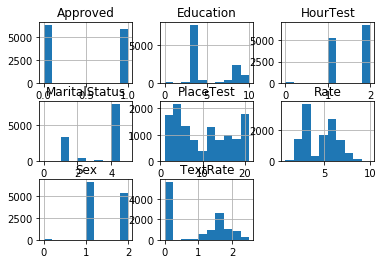

In [37]:
df2[['PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved']].hist()

In [38]:
df2.groupby('Approved')['Approved']\
    .agg({'HowMany': 'count'})\

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,HowMany
Approved,
0,6273
1,5826


In [39]:
df2.assign(NotApproved=1 - df2['Approved']).groupby('PlaceTest').sum().reset_index()

,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate,Month,Year,NotApproved
0,1,4127.05,707.80,1326,1270,2514,4569,431,4834.85,442,3419,1811126,467
1,2,3835.20,722.20,1372,1199,2530,4143,416,4557.40,441,4618,1687929,421
2,3,6613.10,1109.60,2359,2367,5204,6484,622,7722.70,712,8271,3117636,934
3,4,2995.15,620.40,861,821,1777,3045,348,3615.55,381,3522,1228131,261
4,5,4052.96,836.71,1179,1073,2189,4002,480,4889.67,497,4201,1566937,297
5,6,2718.55,616.30,915,755,1528,2647,320,3334.85,364,2914,1099094,225
6,7,972.25,179.50,335,335,789,1082,73,1151.75,108,1009,488114,169
7,8,2682.55,539.30,844,784,1783,2672,292,3221.85,321,3190,1121235,264
8,9,603.45,130.70,228,219,428,756,60,734.15,80,378,284397,81
9,10,937.95,184.20,347,346,739,1084,83,1122.15,112,836,463877,147


In [40]:
df_Winners = df2[df2.Approved == 1]
df_Losers = df2[df2.Approved == 0]

In [41]:
df_Winners.describe()
df_Losers.describe()

,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate,Month,Year
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.0,6273.000000,6273.000000,6273.000000,6273.000000
mean,9.946278,3.125410,0.126128,1.559700,1.491312,3.121951,4.303842,0.0,3.251538,0.097880,4.903236,2008.360912
std,6.800886,0.784332,0.394745,0.504743,0.508188,1.344496,2.269715,0.0,1.088173,0.297176,4.074174,129.577590
min,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.750000,0.000000,0.000000,0.000000
25%,3.000000,2.750000,0.000000,1.000000,1.000000,1.000000,3.000000,0.0,2.750000,0.000000,1.000000,2016.000000
50%,10.000000,3.000000,0.000000,2.000000,1.000000,4.000000,3.000000,0.0,3.000000,0.000000,4.000000,2017.000000
75%,16.000000,3.500000,0.000000,2.000000,2.000000,4.000000,7.000000,0.0,3.500000,0.000000,8.000000,2017.000000
max,21.000000,6.250000,1.700000,2.000000,2.000000,5.000000,10.000000,0.0,6.650000,1.000000,12.000000,2017.000000


In [42]:
df_Winners.groupby(['PlaceTest']).aggregate('count').reset_index().sort_values('PlaceTest', ascending=False)

,PlaceTest,Id,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
20,21,581,576,581,581,581,581,581,581,576,576,581,581,581,581,581
19,20,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
18,19,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197
17,18,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
16,17,334,333,334,334,334,334,334,334,333,333,334,334,334,334,334
15,16,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
14,15,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
13,14,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
12,13,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
11,12,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280


In [71]:
df_Winners = df_Winners.drop(['Id', 'Neighborhood', 'DateTest', 'Hometown', 'Year'], axis=1)

In [75]:
df_Winners = scale(df_Winners)

In [76]:
df_Winners

array([[ 1.71493641,  1.55931778,  2.28243885, ...,  1.99787489,
         0.        ,  1.06049171],
       [ 1.71493641,  1.43541268,  0.38093685, ...,  1.29108369,
         0.        ,  0.30576741],
       [ 1.71493641,  1.31150758,  0.06401985, ...,  1.08914335,
         0.        , -0.95210642],
       ...,
       [-0.7035131 , -1.22854689, -2.47131616, ..., -1.7885065 ,
         0.        , -1.20368119],
       [-0.7035131 , -1.41440453, -2.15439916, ..., -1.83899158,
         0.        ,  1.31206648],
       [ 1.11032404, -1.04268925,  0.38093685, ..., -0.72831971,
         0.        ,  0.30576741]])

In [122]:
sample = np.arange(1, 5826, 10)

In [127]:
df_Winners_sample = df_Winners[sample,]

In [146]:
from scipy.spatial.distance import pdist
d = pdist(df_Winners_sample)

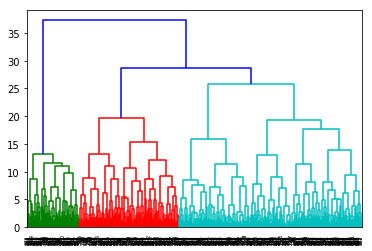

In [147]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

c = ward(d)
d = dendrogram(c)

In [157]:
cutree = cut_tree(c, n_clusters=[20, 50])
cutree[1:10]

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [5, 6],
       [6, 7],
       [7, 8],
       [7, 8]])

In [156]:
as.matrix(cutree)

SyntaxError: invalid syntax (<ipython-input-156-84f5e5f9aace>, line 1)

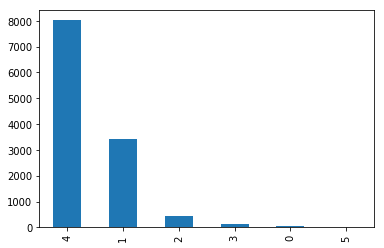

In [43]:
df2.MaritalStatus.value_counts()[:].plot(kind='bar')

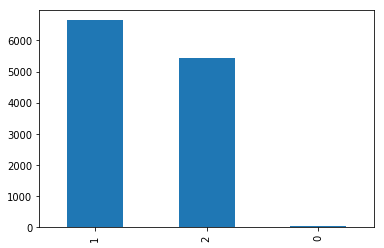

In [44]:
df2.Sex.value_counts()[:].plot(kind='bar')

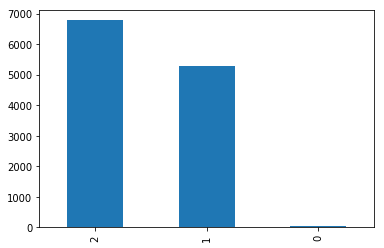

In [45]:
df2.HourTest.value_counts()[:].plot(kind='bar')

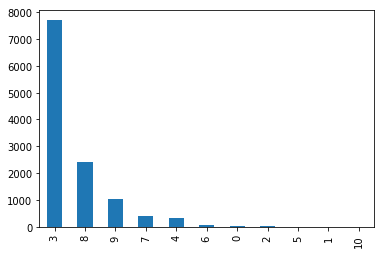

In [46]:
df2.Education.value_counts()[:].plot(kind='bar')

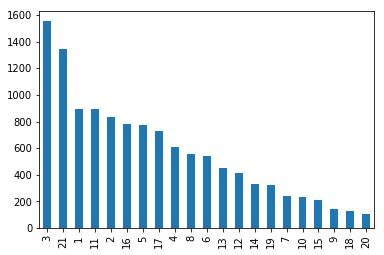

In [47]:
df2.PlaceTest.value_counts()[:].plot(kind='bar')

In [48]:
rfmTable = df_Winners.groupby('PlaceTest').agg({'Id': lambda x: x.count()})

rfmTable['Id'] = rfmTable['Id'].astype(int)
rfmTable.rename(columns={'Id': 'frequency'}, inplace=True)
rfmTable

,frequency
PlaceTest,
1,431
2,416
3,622
4,348
5,480
6,320
7,73
8,292
9,60


In [49]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [50]:
# %%pycodestyle
# Correlation
cols = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education']
print(df2[cols].corr())

               PlaceTest  HourTest       Sex  MaritalStatus  Education
PlaceTest       1.000000  0.048920  0.012054       0.009655  -0.024317
HourTest        0.048920  1.000000  0.032999       0.029899   0.014131
Sex             0.012054  0.032999  1.000000       0.122678   0.029519
MaritalStatus   0.009655  0.029899  0.122678       1.000000  -0.032495
Education      -0.024317  0.014131  0.029519      -0.032495   1.000000


In [51]:
# Attributes and target variables
features = df2[['PlaceTest', 'HourTest','MaritalStatus', 'Education', 'AllRate']]
targetVariables = df2.Approved

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [53]:
# Obtains the observation numbers and attribute numbers
n_observ, n_features = df2.shape

In [54]:
df

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (ï¿½guas Claras),1,9.80,1,10,2017
1,,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
2,,21,2017-02-01,7.20,1.7,2,1,4,3,Brasï¿½lia,Setor Norte,1,8.90,1,2,2017
3,,21,2017-09-01,6.95,1.7,1,2,4,8,BRASï¿½LIA,Guarï¿½ I,1,8.65,1,9,2017
4,,21,2017-10-01,6.90,2.4,1,2,4,3,ANï¿½POLIS,Jardim Europa,1,9.30,1,10,2017
5,,21,2017-10-01,6.90,1.9,1,1,4,3,ALEXï¿½NIA,SETOR NORTE,1,8.80,1,10,2017
6,,21,2017-10-01,6.75,1.5,1,2,4,8,ENTRE RIOS DE MINAS,Sul (ï¿½guas Claras),1,8.25,1,10,2017
7,,21,2017-01-14,6.45,2.2,1,1,4,8,Brasilia,Riacho Fundo II,1,8.65,1,1,2017
8,,21,2017-05-01,6.45,1.7,1,1,4,3,BRASï¿½LIA,Centro,1,8.15,1,5,2017
9,,21,2017-02-01,6.40,1.9,2,2,4,3,Panamï¿½,Setor Norte,1,8.30,1,2,2017


In [55]:
# Applies data scale
df3 = df2
#df3['Rate'] = scale(df3.Rate)
#df3['TextRate'] = scale(df3.TextRate)
#df3['AllRate'] = scale(df3.AllRate)

In [56]:
df.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (ï¿½guas Claras),1,9.80,1,10,2017
1,,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
2,,21,2017-02-01,7.20,1.7,2,1,4,3,Brasï¿½lia,Setor Norte,1,8.90,1,2,2017
3,,21,2017-09-01,6.95,1.7,1,2,4,8,BRASï¿½LIA,Guarï¿½ I,1,8.65,1,9,2017
4,,21,2017-10-01,6.90,2.4,1,2,4,3,ANï¿½POLIS,Jardim Europa,1,9.30,1,10,2017


In [57]:
n_observ

12099

In [58]:
n_features

16

In [59]:
# Obtains the labels
n_digits = len(np.unique(df3.Approved))
labels = df3.Approved

In [60]:
df3 = df3.drop(columns=['Id', 'Rate', 'TextRate', 'AllRate', 'DateTest', 'Neighborhood', 'Hometown'])

TypeError: drop() got an unexpected keyword argument 'columns'

In [ ]:
labels
df3.head()

In [ ]:
# Creates classifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_estimators  = 10)

In [ ]:
# Model construction
clf = clf.fit(df3, labels)

In [ ]:
scores = clf.score(df3,labels)

In [ ]:
print(scores)

In [ ]:
# Extracting importance
importances = clf.feature_importances_
indices = np.argsort(importances)

In [ ]:
# Obtains the indexes
ind=[]
for i in indices:
    ind.append(labels[i])

In [ ]:
# Plots attribute importance
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

In [ ]:
#df3

In [ ]:
# %%pycodestyle
# Usando um algoritmo de arvore de decisão,quais correlações foram encontradas?
# ( disponibilizar o código que vai até o banco, coleta os dados e analisa)

In [65]:
# Correlation between variables
df2.corr()

,Id,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate
Id,1.000000,0.246557,-0.081999,-0.178437,0.005297,0.072428,0.071201,-0.172496,-0.153441,-0.116468,-0.171465
PlaceTest,0.246557,1.000000,-0.029688,-0.007552,0.048759,0.011931,0.009447,-0.024435,-0.021583,-0.022729,-0.014811
Rate,-0.081999,-0.029688,1.000000,0.914293,-0.006001,-0.132599,-0.062073,0.189652,0.884397,0.990431,0.894960
TextRate,-0.178437,-0.007552,0.914293,1.000000,0.002686,-0.091577,-0.039583,0.179295,0.907747,0.961445,0.958287
HourTest,0.005297,0.048759,-0.006001,0.002686,1.000000,0.033077,0.030032,0.012779,-0.005175,-0.003159,0.001033
Sex,0.072428,0.011931,-0.132599,-0.091577,0.033077,1.000000,0.122772,0.030327,-0.096539,-0.121226,-0.100262
MaritalStatus,0.071201,0.009447,-0.062073,-0.039583,0.030032,0.122772,1.000000,-0.032322,-0.051879,-0.055629,-0.054593
Education,-0.172496,-0.024435,0.189652,0.179295,0.012779,0.030327,-0.032322,1.000000,0.162725,0.189846,0.153026
Approved,-0.153441,-0.021583,0.884397,0.907747,-0.005175,-0.096539,-0.051879,0.162725,1.000000,0.909716,0.903396
AllRate,-0.116468,-0.022729,0.990431,0.961445,-0.003159,-0.121226,-0.055629,0.189846,0.909716,1.000000,0.934108


In [66]:
df3

,PlaceTest,HourTest,Sex,MaritalStatus,Education,Approved,HasTextRate
0,21,1,1,1,3,1,1
1,21,1,1,1,4,1,1
2,21,1,1,1,8,1,1
3,21,2,1,4,3,1,1
4,21,1,2,4,8,1,1
5,21,1,2,4,3,1,1
6,21,1,1,4,3,1,1
7,21,1,2,4,8,1,1
8,21,1,1,4,8,1,1
9,21,1,1,4,3,1,1


In [67]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [68]:
# Cria o classificador
rf = RandomForestClassifier(max_depth = 5)

In [69]:
# Obtém os índices a partir do comprimento da variável targetr
idx = list(range(len(df3.Approved)))

In [70]:
# Randomiza o ínidce
np.random.shuffle(idx)

In [71]:
df4_Array = df3.values

In [72]:
# Cria o modelo
rf.fit(df4_Array[idx][:100], df3.Approved[idx][:100].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# Obtém as instâncias (exemplos ou observações) e retorna as probabilidades
instance = df4_Array[idx][100:101]
print(rf.predict_proba(instance))

[[0.1 0.9]]


In [74]:
df3.feature_names = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'HasTextRate']

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [75]:
prediction, bias, contributions = ti.predict(rf, instance)
print ("Previsões", prediction)
print ("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], df3.feature_names):
    print (feature, item)

Previsões [[0.1 0.9]]
Contribuição dos Atributos:
PlaceTest [ 0.01685714 -0.01685714]
HourTest [0. 0.]
Sex [ 0.03214286 -0.03214286]
MaritalStatus [-0.00368852  0.00368852]
Education [ 0.05906044 -0.05906044]
HasTextRate [-0.29141207  0.29141207]


In [76]:
df3.Approved.values

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
# Import 
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [78]:
# Imprimindo o nome das colunas
print(df2.columns)

Index(['Id', 'PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved', 'AllRate', 'HasTextRate'], dtype='object')


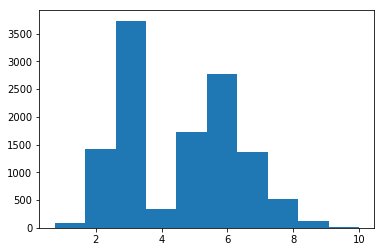

In [79]:
# Histograma com a média de avaliações
plt.hist(df2["Rate"])
plt.show()

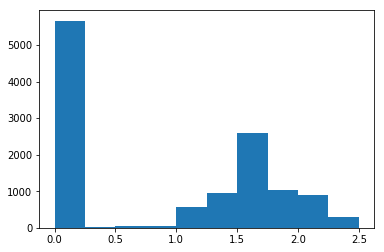

In [80]:
plt.hist(df2["TextRate"])
plt.show()

In [81]:
# Visualizando as observações com rating igual a 0
df2[df2["TextRate"] == 0]

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
2306,2306,21,12/01/2017,4.50,0.0,1,2,2,3,planaltina,Setor norte,0,4.50,0
2310,2310,21,15/01/2017,4.00,0.0,1,1,1,8,Brasília,Guará I,0,4.00,0
2311,2311,21,02/01/2017,4.00,0.0,2,2,4,3,Serra Dourada,Jd. Progresso,0,4.00,0
2312,2312,21,10/01/2017,4.00,0.0,1,1,1,7,MUNDO NOVO - BA,Riacho Fundo II,0,4.00,0
2313,2313,21,12/01/2017,3.75,0.0,1,1,1,3,morros,setor leste,0,3.75,0
2314,2314,21,02/01/2017,3.75,0.0,1,1,4,3,alexânia,Centro,0,3.75,0
2315,2315,21,06/01/2017,3.50,0.0,2,2,4,3,Brasília,Asa Sul,0,3.50,0
2316,2316,21,05/01/2017,3.50,0.0,1,1,1,3,Teodoro Sampaio,Centro,0,3.50,0
2317,2317,21,02/01/2017,3.25,0.0,1,1,4,3,Alexânia,Taguatinga sul,0,3.25,0
2318,2318,21,12/01/2017,3.25,0.0,1,2,2,3,pio ix,Setor Norte,0,3.25,0


In [82]:
# Correlação
df2.corr()["TextRate"]

Id              -0.178437
PlaceTest       -0.007552
Rate             0.914293
TextRate         1.000000
HourTest         0.002686
Sex             -0.091577
MaritalStatus   -0.039583
Education        0.179295
Approved         0.907747
AllRate          0.961445
HasTextRate      0.958287
Name: TextRate, dtype: float64

In [83]:
# Obtém todas as colunas do dataframe
colunas = df2.columns.tolist()

In [84]:
# Filtra as colunas e remove as que não são relevantes
colunas = [c for c in colunas if c not in ["Id", "Approved", "AllRate", "HasTextRate", "TextRate", "Neighborhood", "Hometown", "DateTest"]]

In [85]:
# Preparando a variável target, a que será prevista
target = "TextRate"

In [86]:
# Gerando os dados de treino
df_treino = df2.sample(frac = 0.8, random_state = 101)

In [87]:
# Seleciona tudo que não está no dataset de treino e armazena no dataset de teste
df_teste = df2.loc[~df2.index.isin(df_treino.index)]

In [88]:
# Shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

(9680, 14)
(2420, 14)


In [89]:
# Criando um Regressor
reg_v1 = LinearRegression()

In [90]:
# Fit the model to the training data.
modelo_v1 = reg_v1.fit(df_treino[colunas], df_treino[target])

In [91]:
modelo_v1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Fazendo previsões
previsoes = modelo_v1.predict(df_teste[colunas])

In [93]:
# Computando os erros entre valores observados e valores previstos
mean_squared_error(previsoes, df_teste[target])

0.12275918193189952

In [94]:
# Criando um regressor Random Forest
reg_v2 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [95]:
# Criando o modelo
modelo_v2 = reg_v2.fit(df_treino[colunas], df_treino[target])

In [96]:
# Fazendo previsões
previsoes = modelo_v2.predict(df_teste[colunas])

In [97]:
# Computando o erro
mean_squared_error(previsoes, df_teste[target])

0.05121030687446029

In [100]:
df2.to_csv("DOT_teste_data_science_2.csv", sep='\t')

In [101]:
!ls

'Cientista de Dados Teste.ipynb'   DOT_teste_data_science.csv
 DOT_teste_data_science_2.csv
